# Python for Data Science Practice Session 4 : Mathematics and Statistics

In [219]:
#Import pandas, numpy, numpy.random and matplotlib.pyplot 
import pandas as pd
import numpy as np
from numpy import random
import matplotlib.pyplot as plt

## Missing data types: A closer look

In this section, I would like to talk more about missing values. It is one of the most influential problems that have to be dealt with carefully by Data Scientists, and even by other practitioners in different fields who analyse and use data to help in forming decisions/conclusions. Together, we will go through the three main types of missing values: Missing Completely at Random, Missing at Random and Missing Not at Random. Then, we will build up on the imputation methods discussed in this week's teaching session by using two more complex ones, namely Expectation Maximization and Linear Regression. We will also make use of the dataframe reshaping methods that we learned in this week's teaching session to help make our lives easier throughout this project session.

Let's start by generating a mock dataset that we will use to demonstrate the different missing value types. This dataset will contain simulated data of three consecutive lap times for ten F1 racing drivers on a track.

Start by creating a Pandas dataframe with column labels 'D1', 'D2', 'D3', ... , 'D10' representing the ten drivers we have, and indexes 'Lap1', 'Lap2' representing the first two lap times for each driver.

In [220]:
#Create the dataframe as specified above
drivers = pd.DataFrame(columns=['D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10'], index = ['Lap 1', 'Lap 2'])
drivers

,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10
Lap 1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Lap 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Now, we simulate lap time values from normal distributions. Assume that for the first lap times, data are normally distributed with a mean of 150 and standard deviation of 10. Then in lap 2, data are normally distributed with a mean of 145 and a standard deviation of 10. Simulating the data in this way allows for the possibility for some drivers improving their lap time in their second trial and some other drivers worsening their lap time in their second trial.

In [221]:
#Simulate data from normal distributions for laps 1 and 2 using the means and standard deviations specified above
drivers.loc['Lap 1'] = random.normal(150, 10, 10)
drivers.loc['Lap 2'] = random.normal(145, 10, 10)

In [222]:
#View the dataset
drivers

,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10
Lap 1,147.582634,138.507333,153.155199,162.9858,152.104515,146.067233,150.322831,158.15057,136.673198,149.408646
Lap 2,150.336098,141.778606,159.799375,131.80352,129.546147,144.422052,141.831898,150.243775,144.831114,132.678621


The structure of the dataframe is not visually pleasing in my opinion, especially that we have ten columns and only two rows. Try transposing the dataframe: 

In [223]:
#Transpose the dataset
drivers = drivers.transpose()

In [224]:
#View the dataset
drivers

,Lap 1,Lap 2
D1,147.582634,150.336098
D2,138.507333,141.778606
D3,153.155199,159.799375
D4,162.9858,131.80352
D5,152.104515,129.546147
D6,146.067233,144.422052
D7,150.322831,141.831898
D8,158.15057,150.243775
D9,136.673198,144.831114
D10,149.408646,132.678621


This looks much better, let us now proceed. 

Now, create a column for lap 3 times where drivers who score better lap times in their second lap than their first lap have their data generated from a normal distribution of mean of 140 and standard deviation of 5, and drivers who score worse in their second lap than their first lap have their lap 3 times generated from a normal distribution of mean 155 and standard deviation of 5. This can be thought of in the following sense: The drivers who do better in lap 2 than lap 1 are more likely to be motivated and improve on their lap 2 times with a faster lap 3 time, and people who score worse in lap 2 might be disappointed and thus more likely to score worse in lap 3. (Of course you can argue that this is not usually the case in real life, but for simplicity, we will proceed with it as it will help us in the explanation of the different missing data types).

In [225]:
#Create the column Lap 3 following the scenario mentioned above
Lap3 = []
for i in range(drivers.shape[0]):
    if drivers.iloc[i]['Lap 2'] - drivers.iloc[i]['Lap 1']  < 0 :
        Lap3.append(random.normal(140,5,1)[0])
    else: 
        Lap3.append(random.normal(155,5,1)[0])
drivers['Lap 3'] = Lap3

In [226]:
#View the dataset
drivers

,Lap 1,Lap 2,Lap 3
D1,147.582634,150.336098,150.452330
D2,138.507333,141.778606,146.514403
D3,153.155199,159.799375,159.401573
D4,162.9858,131.80352,146.646486
D5,152.104515,129.546147,137.394809
D6,146.067233,144.422052,135.695247
D7,150.322831,141.831898,131.876461
D8,158.15057,150.243775,140.312829
D9,136.673198,144.831114,152.925621
D10,149.408646,132.678621,148.485007


## Missing Completely At Random (MCAR)

From its name, missing data are said to be missing completely at random if they are missing due to completely random reasons. There is no specific pattern in the dataset: 
- No relationships between the variable with missing values and other variables.
- No relationship between the variable with missing values and itself. 

An example for this in our dataset would be:
- The tracking device on one of the cars suddenly got damaged.
- A cars' engine broke down before finishing one of the laps.

We are now going to create a column called MCAR which could represent Lap 3 times from real life data where the missing Lap 3 times for some of the drivers are missing completely at random. 

There are plenty of ways to do so, but the one I would hint towards is multiplying each lap 3 times with a number simulated from a binomial distribution with probability of success equalling 0.5 

In [227]:
#Create the column called MCAR for Lap 3 times, with some of them missing completely at random
drivers['MCAR'] = random.binomial(1,0.5,size=10)*drivers['Lap 3'] 
drivers['MCAR'] = drivers['MCAR'].replace(0, np.nan)

In [228]:
#View the dataset
drivers

,Lap 1,Lap 2,Lap 3,MCAR
D1,147.582634,150.336098,150.452330,NaN
D2,138.507333,141.778606,146.514403,NaN
D3,153.155199,159.799375,159.401573,159.401573
D4,162.9858,131.80352,146.646486,146.646486
D5,152.104515,129.546147,137.394809,NaN
D6,146.067233,144.422052,135.695247,135.695247
D7,150.322831,141.831898,131.876461,NaN
D8,158.15057,150.243775,140.312829,NaN
D9,136.673198,144.831114,152.925621,NaN
D10,149.408646,132.678621,148.485007,148.485007


## Missing At Random (MAR)

Missing values are said to be Missing at Random if they are missing due to a dependance on other variable/s. This means that for any observation, a variable being missing depends on other variable/s' values. An example for this in our dataset would be: 

- Drivers who scored 10-seconds slower lap 2 times or more than lap 1 times are ordered by their teams not to attempt a third lap as this might indicate loss of power in the car's engine. So, the availability of lap 3 times are affected by the times for laps 1 and 2. 

In [229]:
#Create a column called MAR that follows the scenario in the above bulletpoint
x = []
for i in range(drivers.shape[0]):
    if drivers.iloc[i]['Lap 2'] - drivers.iloc[i]['Lap 1'] > 10:
        x.append(np.nan)
    else: 
        x.append(drivers.iloc[i]['Lap 3'])
drivers['MAR'] = x

In [230]:
#View the dataset
drivers

,Lap 1,Lap 2,Lap 3,MCAR,MAR
D1,147.582634,150.336098,150.452330,NaN,150.452330
D2,138.507333,141.778606,146.514403,NaN,146.514403
D3,153.155199,159.799375,159.401573,159.401573,159.401573
D4,162.9858,131.80352,146.646486,146.646486,146.646486
D5,152.104515,129.546147,137.394809,NaN,137.394809
D6,146.067233,144.422052,135.695247,135.695247,135.695247
D7,150.322831,141.831898,131.876461,NaN,131.876461
D8,158.15057,150.243775,140.312829,NaN,140.312829
D9,136.673198,144.831114,152.925621,NaN,152.925621
D10,149.408646,132.678621,148.485007,148.485007,148.485007


## Missing Not at Random (MNAR)

Missing values are said to be Missing Not at Random if they are missing because of their values themselves. This might sound unintuitive, but here is an example from our dataset that will make it clearer: 

- Assume that drivers on this track generally score in the range of 120-160 seconds. Drivers who score above 160 seconds on Lap 3 get disheartened by that and sometimes decide not to report their scores as they are afraid it will reflect badly on their performance. This means that missing values in lap 3 are missing because of the time scored in lap 3.

In [231]:
# Create a column called MNAR that follows the scenario in the above bulletpoint
x = []
for i in range(drivers.shape[0]):
    if drivers.iloc[i]['Lap 3'] > 160:
        x.append(np.nan)
    else: 
        x.append(drivers.iloc[i]['Lap 3'])
drivers['MNAR'] = x

In [232]:
#View the dataset
drivers

,Lap 1,Lap 2,Lap 3,MCAR,MAR,MNAR
D1,147.582634,150.336098,150.452330,NaN,150.452330,150.452330
D2,138.507333,141.778606,146.514403,NaN,146.514403,146.514403
D3,153.155199,159.799375,159.401573,159.401573,159.401573,159.401573
D4,162.9858,131.80352,146.646486,146.646486,146.646486,146.646486
D5,152.104515,129.546147,137.394809,NaN,137.394809,137.394809
D6,146.067233,144.422052,135.695247,135.695247,135.695247,135.695247
D7,150.322831,141.831898,131.876461,NaN,131.876461,131.876461
D8,158.15057,150.243775,140.312829,NaN,140.312829,140.312829
D9,136.673198,144.831114,152.925621,NaN,152.925621,152.925621
D10,149.408646,132.678621,148.485007,148.485007,148.485007,148.485007


A good question right now would be: How to detect whether the missing values in your dataset are MCAR, MAR or MNAR? 

Here is a good discussion I found on Kaggle: https://www.kaggle.com/questions-and-answers/105010 

Now, we move onto the more advanced missing value imputation methods, starting with Expectation Maximization.

## Expectation Maximization

Expectation Maximization is an iterative algorithm used to calculate the maximum likelihood estimates for the parameters of a statistical model that depends on latent variables (or unobserved variables). Due to its nature of working with statistical models of unobserved variables, it is suitable for missing data imputations.

In more details, suppose you have an explicit form for the joint distribution of $X_{obs}$ (the observed data), and $X_{mis}$ (the missing data). The goal is to estimate the parameters $\theta \in \mathbb{R}^{d}$ for the statistical model of the joint distribution ($X_{obs}$,$X_{mis}$) by calculating the maximum likelihood estimates for the likelihood function of the marginal distribution of $X_{obs}$. We have that:
$$
L(\theta ; X_{obs}) = p(X_{obs} | \theta) = \int p(X_{obs},X_{mis} | \theta) \, dX_{mis} = \int p(X_{obs} | X_{mis},\theta) p(X_{mis}|\theta) \, dX_{mis} 
$$
As we do not observe the missing values $X_{mis}$, we cannot always compute the above explicitly. 

This is where EM comes into play. It obtains the maximum likelihood estimates for the marginal distribution of $X_{obs}$ by iteratively maximizing the expected complete-data log likelihood. Here are the two steps of the iteration:

Start with an initial estimate $\theta^{(0)}$ and let $\theta^{(t)}$ be the iterate for the parameter $\theta$ in the  $t^{th}$ iteration of the algorithm.

<b> 1) Expectation: </b> Compute the expectation of the log likelihood of the complete-data with respect to the conditional distribution of $X_{mis}$ parameterized by $\theta^{(t)}$: 
$$
Q(\theta, \theta^{(t)}) = \mathbb{E}_{X_{mis} | X_{obs},\theta^{(t)}}[log(l(\theta ; X_{obs}, X_{mis})]
$$

<b> 2) Maximization: </b> Obtain the value of $\theta$ that maximizes Q($\theta$, $\theta^{(t)})$:

$$
\theta^{(t+1)} = argmax_{\theta} \, Q(\theta, \theta^{(t)})
$$

The algorithm keeps iterating until it reaches a point where the difference between the estimates is negligible, and the algorithm is thought to have converged.

In a nutshell, the algorithm starts with $\theta^{(0)}$, then it estimates the values for the missing data using the observed data and the parameters $\theta^{(0)}$, then it calculates the maximum likelihood parameter estimates for the complete-data, then it estimates new values for the previous missing data, and then the process keeps repeating until it converges. 


Expectation Maximization only works with MCAR and MAR missing data, and it works specifically well with distributions from the exponential family. One thing to bear in mind is that it calculates the local maximum likelihood estimates, and so for multimodal distributions, the global likelihood might not be obtained. 

- - - - - -

Let us work through a simulated dataset from a multivariate normal distribution, where we are going to remove data randomly using the help of a binomial distribution as we did before; so that they fall under the MCAR missing data category.

We are going to simulate random vectors of size 3 from a multivariate normal distribution with the following mean vector and variance covariance matrix (Feel free to change the parameters if you'd like):

In [233]:
#The mean vector
Mean = random.normal(10,5,3)
Mean

array([ 9.22781297, 10.30629951,  4.95207463])

In [234]:
#The variance-covariance matrix
Cov_matrix = np.array([[1,1,1], [1,1,1], [1,1,1]])
Cov_matrix

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]])

In [235]:
#Generate 200 vectors from a multivariate normal distribution with the mean vector and var-cov matrix specified above 
sim_array = random.multivariate_normal(Mean, Cov_matrix, 200)

In [236]:
#View the first 10 vectors
sim_array[:10,:]

array([[ 8.77210963,  9.85059616,  4.49637129],
       [10.2155584 , 11.29404494,  5.93982007],
       [ 9.82557538, 10.90406191,  5.54983704],
       [ 8.61339306,  9.6918796 ,  4.33765473],
       [10.65598589, 11.73447243,  6.38024755],
       [ 9.1705285 , 10.24901504,  4.89479017],
       [ 9.30493217, 10.38341871,  5.02919384],
       [ 7.85128103,  8.92976756,  3.57554269],
       [ 9.16193006, 10.2404166 ,  4.88619173],
       [ 9.75143103, 10.82991757,  5.4756927 ]])

Now, we are going to remove some of the data randomly from the third entry of the vectors so that we could then try imputing them using EM and other simple imputations methods. 

Let us start by creating a copy from the array so that we could have a full array and another array with MCAR values in the third entry that we could impute and compare to the original array.

In [237]:
#Create a copy from the original array
sim_array_missing = sim_array.copy()

In [238]:
#Remove data from the third entry randomly (as done before)
sim_array_missing[:,2] = sim_array_missing[:,2]*random.binomial(1,0.5,200)
sim_array_missing[:,2] = np.where(sim_array_missing[:,2] == 0, np.nan, sim_array_missing[:,2])

Download a library called `impyute` using `pip install impyute`. 

Then, import impyute as impy into the notebook:

In [239]:
#import impyute
import impyute as impy

Quickly research how impyute is used, and then create three arrays where each array has its missing values imputed using one of the following methods: 

- Expectation Maximization
- Mean
- Median 

In [240]:
#Create the array imputed with EM
sim_array_em_imputed = impy.em(sim_array_missing)

In [241]:
#Create the array imputed with the mean
sim_array_mean_imputed = impy.mean(sim_array_missing)

In [242]:
#Create the array imputed with the median
sim_array_median_imputed = impy.median(sim_array_missing)

## Comparing them together

Now, we are going to specify the entries that were imputed in the three imputation methods, and then compare them by concatenating them together alongside the original data, and then using matplotlib to plot a graph for the data from the three imputed methods as well as the original data. 

Let us start by specifying the indices of the observations where there was a missing value in the third entry: 


In [243]:
#Create an array with the indices of the observations where there was a missing value in the third entry
indices = np.argwhere(np.isnan(sim_array_missing))[:,0]

In [244]:
#Create an array with the EM imputed values 
a = sim_array_em_imputed[indices,2]

In [245]:
#Create an array with the mean imputed values
b = sim_array_mean_imputed[indices,2]

In [246]:
#Create an array with the median imputed values 
c = sim_array_median_imputed[indices,2]

In [247]:
#Create an array with the original data 
d = sim_array[indices,2]

Now, create three datasets where each dataset contain the imputed values from one data imputation method, and one final dataset with the original data.

In [248]:
#Create a dataset with the EM imputed values
EM = pd.DataFrame(data=a, columns=['EM_imputed'])
EM

,EM_imputed
0,4.448951
1,4.027320
2,4.004348
3,4.979473
4,3.767864
...,...
95,5.392949
96,4.563252
97,3.639849
98,5.269673


In [249]:
#Create a dataset with the mean imputed values
Mean = pd.DataFrame(data=b, columns=['Mean_imputed'])
Mean

,Mean_imputed
0,4.881911
1,4.881911
2,4.881911
3,4.881911
4,4.881911
...,...
95,4.881911
96,4.881911
97,4.881911
98,4.881911


In [250]:
#Create a dataset with the median imputed values
Median = pd.DataFrame(data=c, columns=['Median_imputed'])
Median 

,Median_imputed
0,5.030792
1,5.030792
2,5.030792
3,5.030792
4,5.030792
...,...
95,5.030792
96,5.030792
97,5.030792
98,5.030792


In [251]:
#Create a dataset with the original values
Original = pd.DataFrame(data=d, columns=['Original'])
Original

,Original
0,4.496371
1,5.549837
2,4.894790
3,5.029194
4,6.046100
...,...
95,6.151752
96,6.697981
97,2.464250
98,3.735412


Now, concatenate the four datasets together to help in the comparison between the values from the different imputation methods:

In [252]:
#Concatenate the above four datasets 
full_dataset = pd.concat((EM, Mean, Median, Original), axis=1)

In [253]:
#View the new dataset
full_dataset

,EM_imputed,Mean_imputed,Median_imputed,Original
0,4.448951,4.881911,5.030792,4.496371
1,4.027320,4.881911,5.030792,5.549837
2,4.004348,4.881911,5.030792,4.894790
3,4.979473,4.881911,5.030792,5.029194
4,3.767864,4.881911,5.030792,6.046100
...,...,...,...,...
95,5.392949,4.881911,5.030792,6.151752
96,4.563252,4.881911,5.030792,6.697981
97,3.639849,4.881911,5.030792,2.464250
98,5.269673,4.881911,5.030792,3.735412


Now, plot a line graph for the data imputed from the three imputation methods as well as the original data in one plot:

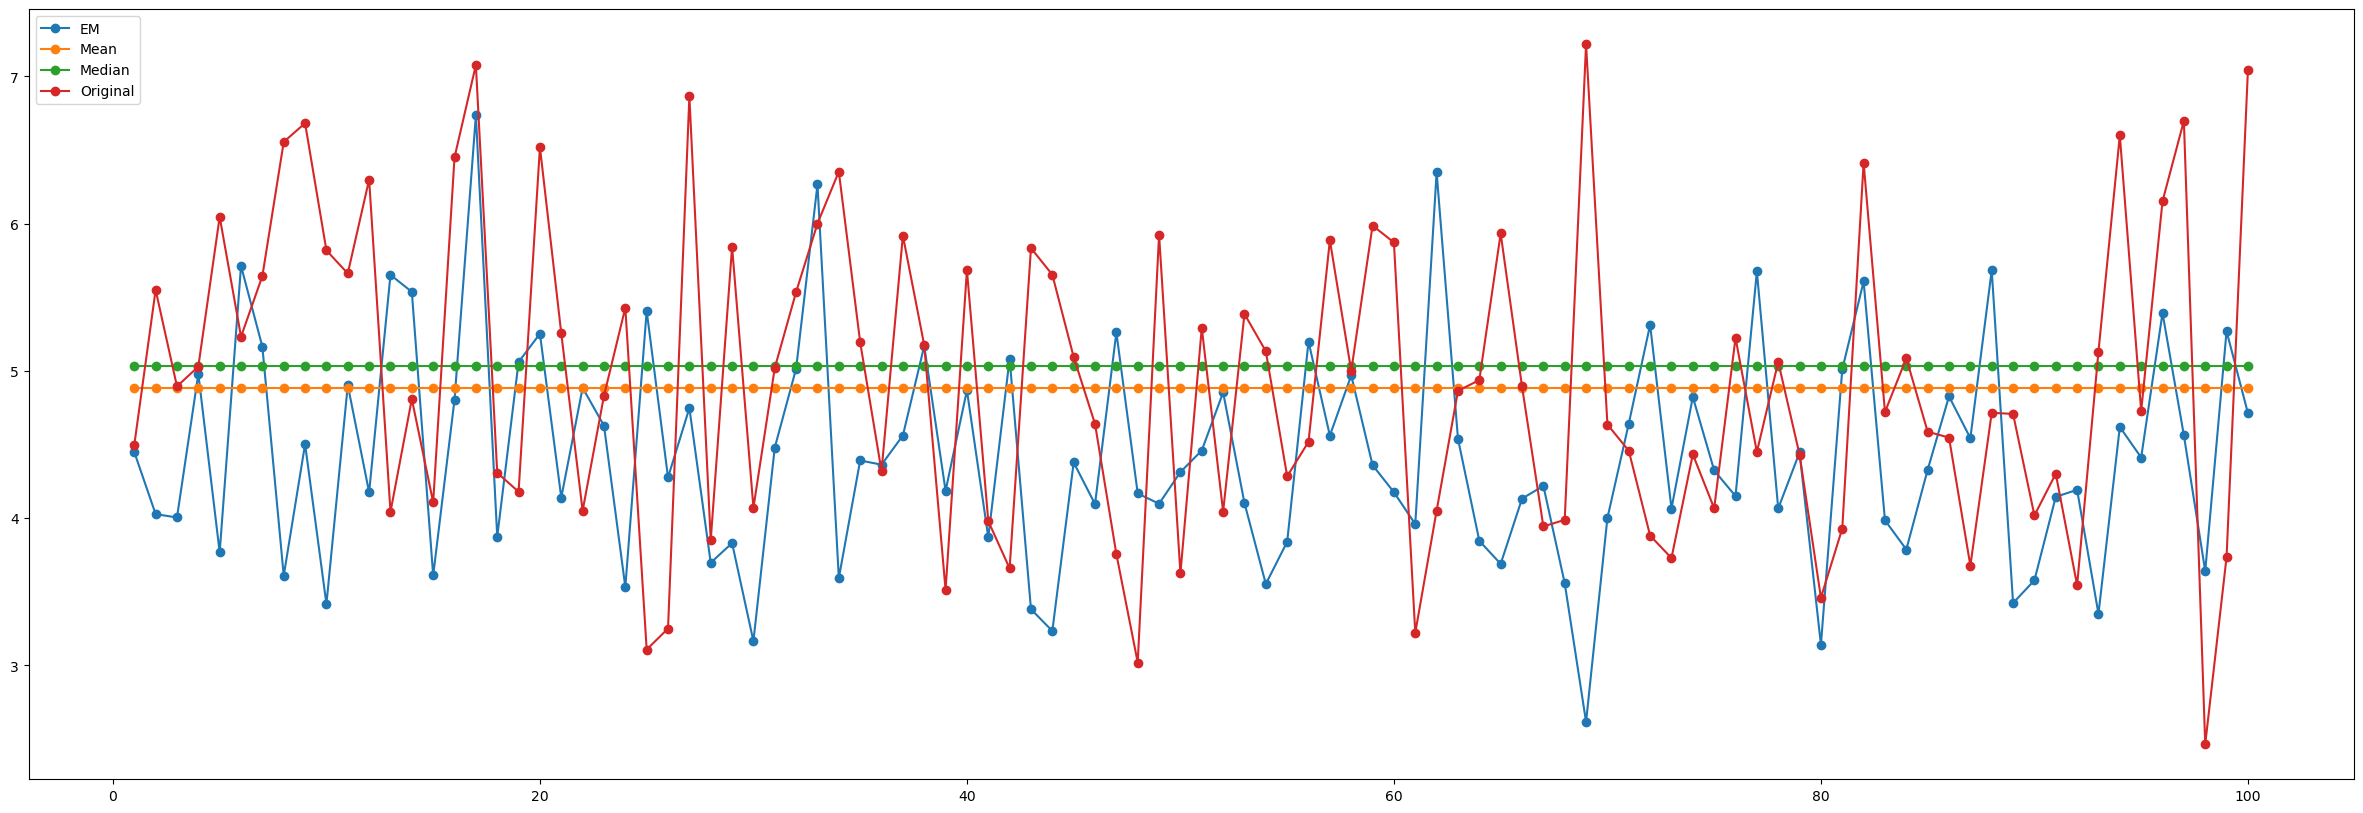

In [254]:
#Plot a line graph for the data imputed from the three imputation methods and the original data 
x = np.linspace(1,a.size, a.size)
fig, ax = plt.subplots(figsize=(30,10))
ax.plot(x, a, marker='o',label='EM')
ax.plot(x,b,marker='o', label='Mean')
ax.plot(x,c,marker='o', label='Median')
ax.plot(x,d,marker='o', label='Original')
ax.legend()
plt.show()

- - - - - -

## Linear Regression imputation

If you have a dataset where one of the variables has some missing values, and this variable correlates strongly with one other or more variables in the dataset, then Linear Regression imputation might work really well. 

It fits a linear regression model where the variable with the missing values is the target/response variable, and the other variable/s (has no missing data) that correlate with it as the predictor variable/s. 

Because relationships/correlations between variables are conserved in this imputation method, it has an advantage over the simpler imputation methods such as the mean and median in some of the cases.

There are two versions for this imputation method: 

<b> 1) Deterministic Regression Imputation: </b>

This is when the missing values are imputed with the exact predictions from the linear regression model, without adding any error terms to it. A disadvantage for this is that it reduces the variability of the imputed variable. This is because the imputed values would lie exactly on the regression hyperplane, which is not a very good representative of real world data. This leads to the second version.

<b> 2) Stochastic Regression Imputation: </b>

This follows the same idea of Deterministic Regression Imputation but with the addition of a random error term to the predicted value. 

You will try by yourself an example of imputing missing data using both methods to see how each one performs. 

Again, let us simulate two variables that are correlated.

Start by generating 100 data points from a normal distribution of mean 5 and standard deviation 1. Call this array col1.

In [255]:
# Generate 100 data points from a normal distribution of mean 5 and standard deviation 1. 
v1 = random.normal(5,1,100)
v1

array([5.30372288, 5.4189027 , 5.27601867, 4.96765858, 6.71622348,
       5.31589849, 5.53911109, 5.98400873, 4.5693653 , 4.05450154,
       4.63628328, 4.24735764, 6.48897293, 4.33869898, 6.06274383,
       5.35337892, 4.83599779, 5.31616625, 5.15266628, 4.65877457,
       4.23540171, 5.92485506, 4.42491761, 5.06258553, 4.9401619 ,
       4.18148687, 6.27046676, 7.54014891, 4.47604068, 6.55749078,
       5.87433196, 4.17391375, 4.66509266, 5.15440417, 5.52977017,
       3.27423123, 5.66939445, 4.64251845, 4.60005133, 3.93346615,
       6.09775976, 6.09801757, 3.81195953, 3.78918454, 6.77330962,
       5.54461105, 2.55145973, 5.31431313, 5.98405194, 3.57978212,
       3.6082313 , 6.07709669, 4.92862148, 5.74184466, 5.65834601,
       6.15665269, 5.30213257, 4.68355572, 4.52884047, 4.5831477 ,
       5.60731149, 3.58625691, 6.14637114, 4.04212615, 6.40693223,
       5.06771947, 4.26629199, 3.3925818 , 5.42678301, 5.01641025,
       3.55596701, 4.46831695, 4.96411612, 4.74057135, 6.48944

Simulate another random variable that correlates with it. Remember to add a random noise/term to prevent the two variables from correlating perfectly. Call this array col2.

In [256]:
#Generate another 100 data points that correlate with the previously generated 100 data points
v2 = (2*v1) + random.normal(0,1,100) 
v2

array([10.14188893, 11.55053018, 10.10973502, 10.45769726, 12.29633241,
       12.08334831, 10.221328  , 12.47673783,  9.46583209,  9.41283413,
       10.41927421,  8.7738894 , 12.74634915,  8.24277917, 12.41559169,
       10.59401537,  9.77186406, 10.67052704,  9.97431669, 10.07819691,
        8.62463686, 11.0578627 ,  8.78817968,  9.8182814 , 10.21901524,
        8.47752774, 14.5604612 , 15.48376609,  9.9640951 , 14.01520281,
       13.22317039,  7.47374108,  8.27619095, 11.62467008, 11.79622437,
        6.5949954 , 10.28222704, 10.08661518, 10.10099312,  8.13143369,
       13.79612628, 13.01685361,  6.98639512,  8.38770166, 13.28008542,
        9.13344642,  5.52476687, 11.74317703, 14.19908454,  7.08023112,
        7.66677901, 12.6403061 ,  8.95181196, 11.88901375,  9.63537823,
       10.80946833, 10.52846244,  8.53118123,  8.83423651,  9.36659647,
       12.34800177,  7.62225513, 12.41599591,  7.28312991, 14.22956702,
        9.90254481,  6.95310474,  5.50050232, 10.03225107, 10.24

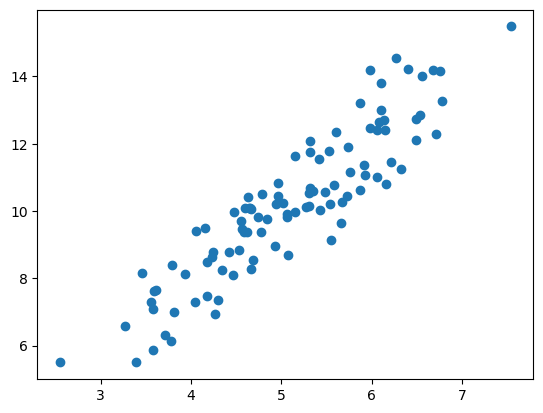

In [257]:
#Create a scatterplot for col2 against col1
plt.scatter(v1, v2)
plt.show()

Again, we will remove data randomly from col2 using the binomial distribution; so that the missing data fall under the MCAR type.

In [258]:
#Create a copy of v2.
v2_missing = v2.copy()

In [259]:
#Remove data randomly
v2_missing = random.binomial(1,0.5,size=col2_missing.size)*v2_missing
v2_missing = np.where(v2_missing == 0, np.nan, v2_missing)

In [260]:
#View v2 with missing data
v2_missing

array([        nan,         nan, 10.10973502, 10.45769726, 12.29633241,
       12.08334831,         nan, 12.47673783,  9.46583209,         nan,
               nan,         nan,         nan,         nan,         nan,
       10.59401537,         nan, 10.67052704,  9.97431669, 10.07819691,
        8.62463686, 11.0578627 ,         nan,  9.8182814 , 10.21901524,
               nan,         nan,         nan,  9.9640951 , 14.01520281,
       13.22317039,         nan,         nan, 11.62467008,         nan,
               nan,         nan, 10.08661518,         nan,  8.13143369,
               nan, 13.01685361,  6.98639512,  8.38770166,         nan,
               nan,         nan,         nan, 14.19908454,  7.08023112,
        7.66677901,         nan,  8.95181196, 11.88901375,  9.63537823,
       10.80946833,         nan,  8.53118123,         nan,  9.36659647,
               nan,         nan,         nan,         nan,         nan,
        9.90254481,         nan,         nan, 10.03225107,      

In [261]:
#Find the indices of the observations that having a missing value for v2
indices = np.argwhere(np.isnan(v2_missing))[:,0]

In [262]:
dataset = pd.DataFrame(columns=['V1','V2'])
dataset['V1'] = v1
dataset['V2'] = v2_missing
dataset

,V1,V2
0,5.303723,NaN
1,5.418903,NaN
2,5.276019,10.109735
3,4.967659,10.457697
4,6.716223,12.296332
...,...,...
95,6.674042,NaN
96,6.536542,12.865900
97,3.783405,NaN
98,4.780456,NaN


Now, we are going to fit a linear regression model for the observations with no missing data. Recall in the third project session, we went through the steps of creating a linear regression model step by step. Now, we are going to make use of a library called `sklearn` that has a built-in function called LinearRegression. 

Read more about how to use it here, and then use it to fit a linear regression model where v1 is the predictor variable and v2 is the target/response variable. 


In [263]:
#Import LinearRegression from sklearn.linear_model
from sklearn.linear_model import LinearRegression

In [264]:
#Find the indices of the observations that have no missing values 
indices2 = np.argwhere(~np.isnan(v2_missing))[:,0]

In [265]:
#Create X_train for the v1 values for observations with no missing values
X_train = v1[indices2]

In [266]:
#Create y_train for the v2 values for observations with no missing values
y_train = v2_missing[indices2]

The LinearRegression function requires the X_train values to follow a specific format, where each entry is an array on its own, and all of those individual arrays are stacked on top of each others. I will reformat it for you.

In [267]:
X_train = np.reshape(X_train, [X_train.size,1])

In [268]:
#Fit the linear regression model
regress_model = LinearRegression().fit(X_train,y_train)

## Deterministic Linear Regression

Let us start by imputing the missing values using the Deterministic Linear Regression approach. 

Start by using the fitted regression model to predict values for the missing data:

In [269]:
#Create an array of the v1 values of the observations that have missing values 
X_test = v1[indices]

In [270]:
#Reshaping of the array to be suitable for usage in the regression model
X_test = np.reshape(X_test, [X_test.size,1])

In [271]:
#Create an array for the missing v2 values 
y_test = regress_model.predict(X_test)

In [272]:
y_train

array([10.10973502, 10.45769726, 12.29633241, 12.08334831, 12.47673783,
        9.46583209, 10.59401537, 10.67052704,  9.97431669, 10.07819691,
        8.62463686, 11.0578627 ,  9.8182814 , 10.21901524,  9.9640951 ,
       14.01520281, 13.22317039, 11.62467008, 10.08661518,  8.13143369,
       13.01685361,  6.98639512,  8.38770166, 14.19908454,  7.08023112,
        7.66677901,  8.95181196, 11.88901375,  9.63537823, 10.80946833,
        8.53118123,  9.36659647,  9.90254481, 10.03225107,  7.29326499,
        8.11154296, 10.8235037 ,  9.83007992, 11.01564938, 10.50122981,
       14.16059178,  9.7079128 , 10.45998318, 10.76647416, 10.63843303,
       11.45179836, 12.71099656,  9.48240647, 12.86590048, 11.24139924])

Now, create a dataset where each row has the imputed value of v2 by linear regression, and the original value of v2 from the original array:

In [273]:
#Create the dataset as specified above
original = v2[indices]
imputed = y_test
df = pd.DataFrame(columns=['Original', 'Imputed'])
df['Original'] = original
df['Imputed'] = imputed

In [274]:
#View the dataset
df

,Original,Imputed
0,10.141889,10.647822
1,11.550530,10.853750
2,10.221328,11.068668
3,9.412834,8.414368
4,10.419274,9.454522
5,8.773889,8.759171
6,12.746349,12.766904
7,8.242779,8.922478
8,12.415592,12.004859
9,9.771864,9.811587


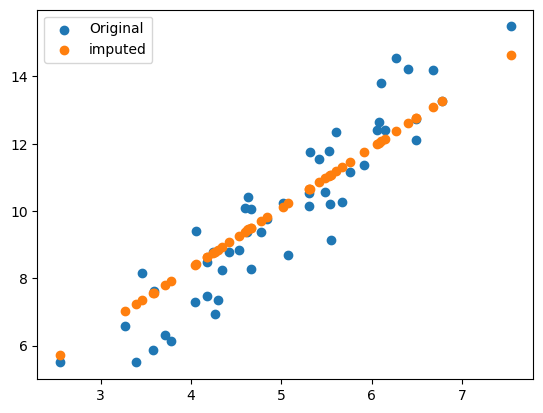

In [275]:
#Plot the observations using the original values and the observations with the imputed values
plt.scatter(X_test, v2[indices], label='Original')
plt.scatter(X_test, y_test, label='imputed')
plt.legend()
plt.show()

Now, I will leave you to try and impute data using Stochastic Linear Regression. This resource might help you out: https://www.kaggle.com/shashankasubrahmanya/missing-data-imputation-using-regression but feel free to do your own research.